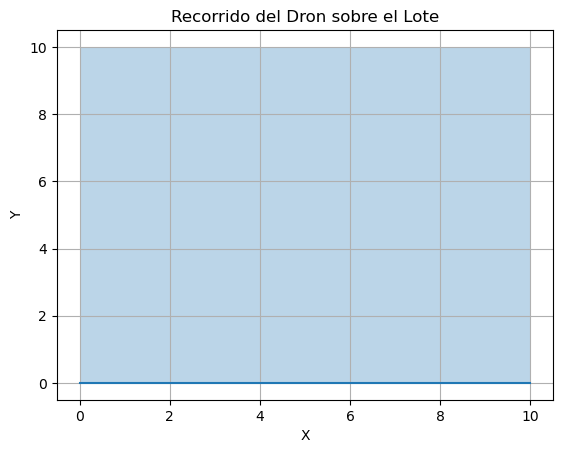

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from shapely.ops import unary_union, polygonize

def generate_drone_path(polygon_coords, distance_between_paths):
    # Crear un polígono a partir de las coordenadas
    polygon = Polygon(polygon_coords)
    
    # Calcular el rectángulo delimitador (bounding box)
    minx, miny, maxx, maxy = polygon.bounds
    
    # Generar líneas paralelas dentro del bounding box
    lines = []
    y = miny
    while y <= maxy:
        lines.append(LineString([(minx, y), (maxx, y)]))
        y += distance_between_paths
    
    # Recortar las líneas para que encajen dentro del polígono
    trimmed_lines = [line.intersection(polygon) for line in lines if line.intersects(polygon)]
    
    # Unir las líneas recortadas en un MultiLineString para simplificar el manejo
    path = unary_union(trimmed_lines)
    
    return path

# Ejemplo de uso
polygon_coords = [(0, 0), (10, 0), (10, 10), (0, 10)]  # Definir las coordenadas del polígono del lote
distance_between_paths = 30  # Distancia de avance en metros

# Generar el recorrido
drone_path = generate_drone_path(polygon_coords, distance_between_paths)

# Visualizar
x, y = drone_path.xy
plt.figure()
plt.plot(x, y)
plt.fill(*Polygon(polygon_coords).exterior.xy, alpha=0.3)  # Dibujar el polígono del lote
plt.title('Recorrido del Dron sobre el Lote')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


In [4]:
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.affinity import rotate
import numpy as np
import matplotlib.pyplot as plt

def generate_drone_path_for_irregular_polygon(polygon_coords, distance_between_paths):
    # Crear el polígono a partir de las coordenadas dadas
    polygon = Polygon(polygon_coords)
    
    # Calcular el rectángulo delimitador mínimo (rotado) para el polígono
    # Esto es más complejo y podría requerir encontrar la orientación óptima
    # Aquí simplemente usaremos el polígono sin rotar para simplificar
    bounds = polygon.bounds
    minx, miny, maxx, maxy = bounds
    
    # Determinar la orientación del recorrido
    width = maxx - minx
    height = maxy - miny
    orientation = 'vertical' if width < height else 'horizontal'
    
    lines = []
    if orientation == 'vertical':
        x = minx
        while x <= maxx:
            line = LineString([(x, miny), (x, maxy)])
            if line.intersects(polygon):
                trimmed_line = line.intersection(polygon)
                lines.append(trimmed_line)
            x += distance_between_paths
    else:
        y = miny
        while y <= maxy:
            line = LineString([(minx, y), (maxx, y)])
            if line.intersects(polygon):
                trimmed_line = line.intersection(polygon)
                lines.append(trimmed_line)
            y += distance_between_paths
    
    # Combina todas las líneas en un MultiLineString
    path = MultiLineString(lines)
    
    return path

# Ejemplo de coordenadas para un polígono irregular
polygon_coords = [(2, 1), (4, 4), (7, 5), (9, 2), (6, 1), (4, 0)]

# Generar el recorrido
distance_between_paths = 1  # Cambiar según sea necesario
drone_path = generate_drone_path_for_irregular_polygon(polygon_coords, distance_between_paths)

# Visualización
fig, ax = plt.subplots()
x, y = Polygon(polygon_coords).exterior.xy
ax.fill(x, y, alpha=0.5, fc='r', ec='none')
for line in drone_path:
    x, y = line.xy
    ax.plot(x, y, 'g', alpha=0.5)

ax.set_title('Recorrido de dron sobre polígono irregular')
plt.show()


TypeError: 'Point' object is not iterable

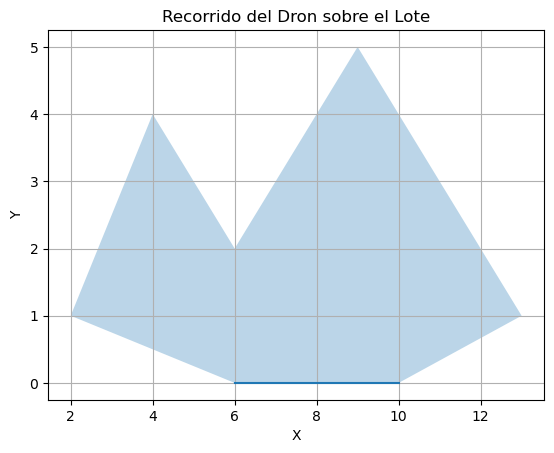

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.ops import unary_union

def generate_drone_path(polygon_coords, distance_between_paths):
    # Crear un polígono a partir de las coordenadas
    polygon = Polygon(polygon_coords)
    
    # Calcular el rectángulo delimitador (bounding box)
    minx, miny, maxx, maxy = polygon.bounds
    
    # Generar líneas paralelas dentro del bounding box
    lines = []
    y = miny
    while y <= maxy:
        lines.append(LineString([(minx, y), (maxx, y)]))
        y += distance_between_paths
    
    # Recortar las líneas para que encajen dentro del polígono
    trimmed_lines = []
    for line in lines:
        if line.intersects(polygon):
            intersection = line.intersection(polygon)
            # Verificar el tipo de la geometría resultante
            if isinstance(intersection, (LineString, MultiLineString)):
                trimmed_lines.append(intersection)
            elif isinstance(intersection, Polygon):
                # En caso de que la intersección sea un polígono, lo convertimos en un LineString
                trimmed_lines.append(LineString(list(intersection.exterior.coords)))
    
    # Unir las líneas recortadas en un MultiLineString para simplificar el manejo
    path = unary_union(trimmed_lines)
    
    return path

# Ejemplo de uso con un polígono irregular
polygon_coords = [(2, 1), (4, 4), (6, 2), (9, 5), (13, 1), (10, 0), (6, 0)]  # Coordenadas de un polígono irregular
distance_between_paths = 30  # Distancia de avance en metros, ajustar según sea necesario

# Generar el recorrido
drone_path = generate_drone_path(polygon_coords, distance_between_paths)

# Visualizar
fig, ax = plt.subplots()
if isinstance(drone_path, MultiLineString):
    for line in drone_path:
        x, y = line.xy
        ax.plot(x, y)
else:
    x, y = drone_path.xy
    ax.plot(x, y)

ax.fill(*Polygon(polygon_coords).exterior.xy, alpha=0.3)  # Dibujar el polígono del lote
ax.set_title('Recorrido del Dron sobre el Lote')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
plt.show()


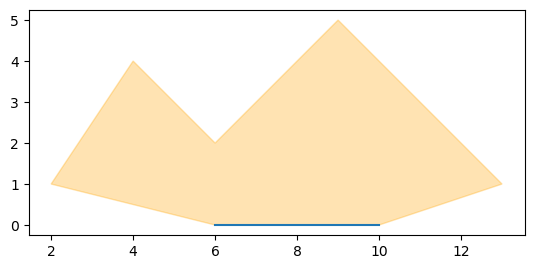

In [6]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from shapely.affinity import rotate

def create_drone_flight_path(polygon, line_spacing):
    # Calcula la orientación principal del polígono para determinar la dirección de las líneas de vuelo
    minx, miny, maxx, maxy = polygon.bounds
    width = maxx - minx
    height = maxy - miny
    
    # Asigna la dirección de las líneas de vuelo en función de la dimensión más larga del polígono
    if width > height:
        # Horizontal (este a oeste)
        angle = 0
    else:
        # Vertical (norte a sur)
        angle = 90

    # Crea una serie de líneas paralelas a lo largo de la dimensión más larga
    x_start, y_start = minx, miny
    lines = []
    while y_start < maxy:
        line = LineString([(x_start, y_start), (maxx, y_start)])
        lines.append(line)
        y_start += line_spacing

    # Rotar el polígono y las líneas a la orientación deseada
    rotated_polygon = rotate(polygon, angle, origin='centroid', use_radians=False)
    rotated_lines = [rotate(line, angle, origin='centroid', use_radians=False) for line in lines]

    # Recortar las líneas para que se ajusten al polígono
    flight_path_lines = [line.intersection(rotated_polygon) for line in rotated_lines if line.intersects(rotated_polygon)]

    # Volver a rotar las líneas a la orientación original
    flight_path = [rotate(line, -angle, origin='centroid', use_radians=False) for line in flight_path_lines]

    return flight_path

# Ejemplo de polígono irregular
polygon_coords = [(2, 1), (4, 4), (6, 2), (9, 5), (13, 1), (10, 0), (6, 0)]
polygon = Polygon(polygon_coords)

# Crear el camino del vuelo del dron con espaciado de 30 metros
flight_path = create_drone_flight_path(polygon, 30)

# Dibuja el polígono y el camino del vuelo del dron
fig, ax = plt.subplots()
for line in flight_path:
    if isinstance(line, LineString):
        x, y = line.xy
        ax.plot(x, y)
ax.fill(*polygon.exterior.xy, alpha=0.3, color='orange')

ax.set_aspect('equal')
plt.show()


TypeError: 'GeometryCollection' object is not iterable

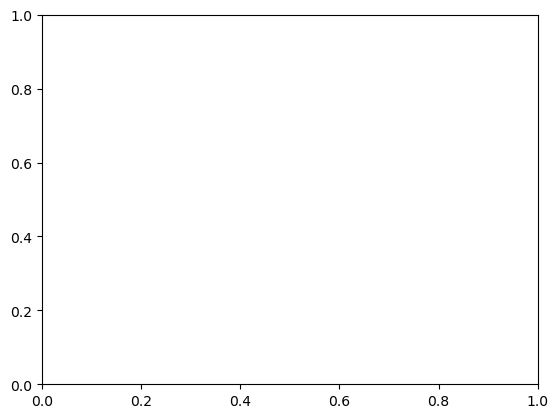

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point

def create_drone_path(polygon, distance_between_lines):
    # Crear un conjunto de líneas base para el recorrido del dron
    minx, miny, maxx, maxy = polygon.bounds
    x_range = np.arange(minx, maxx, distance_between_lines)
    y_range = np.arange(miny, maxy, distance_between_lines)
    
    lines = []
    # Ajustar la dirección de las líneas base según la forma del polígono
    for x in x_range:
        # Ajustar las líneas verticales
        vertical_line = LineString([(x, miny), (x, maxy)])
        if vertical_line.intersects(polygon):
            lines.append(vertical_line.intersection(polygon))
    
    for y in y_range:
        # Ajustar las líneas horizontales
        horizontal_line = LineString([(minx, y), (maxx, y)])
        if horizontal_line.intersects(polygon):
            lines.append(horizontal_line.intersection(polygon))

    # Unir las líneas en una sola trayectoria para el recorrido del dron
    drone_path = unary_union(lines)

    return drone_path

# Ejemplo de uso con un polígono irregular
polygon_coords = [(2, 1), (4, 4), (6, 2), (9, 5), (13, 1), (10, 0), (6, 0)]  # Coordenadas de un polígono irregular
polygon = Polygon(polygon_coords)
distance_between_lines = 30  # Distancia de avance en metros, ajustar según sea necesario

# Generar el recorrido del dron
drone_path = create_drone_path(polygon, distance_between_lines)

# Visualizar
fig, ax = plt.subplots()
for line in drone_path:
    x, y = line.xy
    ax.plot(x, y)

ax.fill(*polygon.exterior.xy, alpha=0.3)  # Dibujar el polígono del lote
ax.set_title('Recorrido del Dron sobre el Lote')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
plt.show()


In [8]:
from shapely.geometry import Polygon, LineString, MultiLineString, GeometryCollection
from shapely.ops import unary_union, linemerge
import matplotlib.pyplot as plt

def create_drone_path(polygon, distance_between_lines):
    lines = []
    minx, miny, maxx, maxy = polygon.bounds
    # Puede ser necesario ajustar el enfoque para decidir entre líneas verticales u horizontales
    y_current = miny
    while y_current < maxy:
        # Crear una línea horizontal a través del polígono
        horizontal_line = LineString([(minx, y_current), (maxx, y_current)])
        # Intersección con el polígono
        intersection = polygon.intersection(horizontal_line)
        # Solo añadir si la intersección es una LineString o MultiLineString
        if isinstance(intersection, (LineString, MultiLineString)):
            lines.append(intersection)
        elif isinstance(intersection, GeometryCollection):
            # Para GeometryCollection, solo añadir los elementos que son LineString o MultiLineString
            for geom in intersection.geoms:
                if isinstance(geom, (LineString, MultiLineString)):
                    lines.append(geom)
        y_current += distance_between_lines

    # Unir todas las líneas en una sola entidad geométrica
    if lines:
        merged_lines = linemerge(lines)
        if isinstance(merged_lines, LineString):
            merged_lines = [merged_lines]
        return MultiLineString(merged_lines)
    else:
        return MultiLineString([])

# Ejemplo de uso con un polígono irregular
polygon_coords = [(2, 1), (4, 4), (6, 2), (9, 5), (13, 1), (10, 0), (6, 0)]
polygon = Polygon(polygon_coords)
distance_between_lines = 0.5  # Puse una distancia menor para visualización

# Generar el recorrido del dron
drone_path = create_drone_path(polygon, distance_between_lines)

# Visualización
fig, ax = plt.subplots()
for line in drone_path:
    x, y = line.xy
    ax.plot(x, y, 'b')

ax.fill(*polygon.exterior.xy, alpha=0.3)  # Dibujar el polígono del lote
ax.set_title('Recorrido del Dron sobre el Lote')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
plt.show()


NotImplementedError: Sub-geometries may have coordinate sequences, but multi-part geometries do not

TypeError: 'MultiLineString' object is not iterable

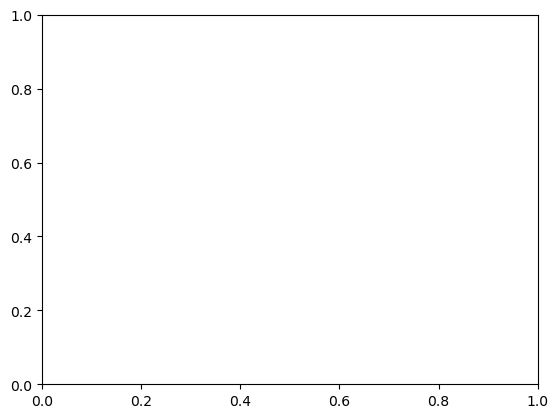

In [9]:
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.ops import unary_union

def plot_line(ax, line):
    x, y = line.xy
    ax.plot(x, y, 'b')

def plot_multilinestring(ax, multiline):
    for line in multiline:
        plot_line(ax, line)

def create_drone_path(polygon, distance_between_lines):
    lines = []
    minx, miny, maxx, maxy = polygon.bounds
    y_current = miny
    while y_current < maxy:
        horizontal_line = LineString([(minx, y_current), (maxx, y_current)])
        intersection = polygon.intersection(horizontal_line)
        
        if isinstance(intersection, (LineString, MultiLineString)):
            lines.append(intersection)
        elif hasattr(intersection, 'geoms'):
            for geom in intersection.geoms:
                if isinstance(geom, (LineString, MultiLineString)):
                    lines.append(geom)
        y_current += distance_between_lines

    # Unir todas las líneas en una sola entidad geométrica
    if lines:
        drone_path = unary_union(lines)
        if isinstance(drone_path, LineString):
            drone_path = MultiLineString([drone_path])
        return drone_path
    else:
        return MultiLineString([])

# Ejemplo de uso con un polígono irregular
polygon_coords = [(2, 1), (4, 4), (6, 2), (9, 5), (13, 1), (10, 0), (6, 0)]
polygon = Polygon(polygon_coords)
distance_between_lines = 0.5  # Ajustar según la escala del polígono

# Generar el recorrido del dron
drone_path = create_drone_path(polygon, distance_between_lines)

# Visualizar el recorrido y el polígono
fig, ax = plt.subplots()

# Para MultiLineString, iteramos sobre cada LineString
if isinstance(drone_path, MultiLineString):
    plot_multilinestring(ax, drone_path)
else:
    plot_line(ax, drone_path)

# Dibujar el polígono
ax.fill(*polygon.exterior.xy, alpha=0.3)
ax.set_title('Recorrido del Dron sobre el Lote')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
plt.show()


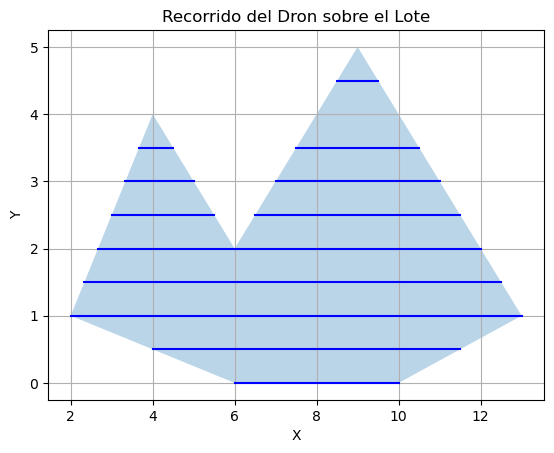

In [10]:
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.ops import unary_union
import matplotlib.pyplot as plt

def plot_line(ax, line):
    x, y = line.xy
    ax.plot(x, y, 'b')

def plot_multilinestring(ax, multiline):
    for line in multiline.geoms:
        plot_line(ax, line)

def create_drone_path(polygon, distance_between_lines):
    lines = []
    minx, miny, maxx, maxy = polygon.bounds
    y_current = miny
    while y_current <= maxy:
        horizontal_line = LineString([(minx, y_current), (maxx, y_current)])
        intersection = polygon.intersection(horizontal_line)
        
        if isinstance(intersection, LineString):
            lines.append(intersection)
        elif isinstance(intersection, MultiLineString):
            for geom in intersection.geoms:
                lines.append(geom)
        
        y_current += distance_between_lines

    # Unir todas las líneas en una sola entidad geométrica
    if lines:
        return unary_union(lines)
    else:
        return MultiLineString([])

# Ejemplo de uso con un polígono irregular
polygon_coords = [(2, 1), (4, 4), (6, 2), (9, 5), (13, 1), (10, 0), (6, 0)]
polygon = Polygon(polygon_coords)
distance_between_lines = 0.5  # Ajustar según la escala del polígono

# Generar el recorrido del dron
drone_path = create_drone_path(polygon, distance_between_lines)

# Visualizar el recorrido y el polígono
fig, ax = plt.subplots()

# Verificar si el drone_path es una instancia de MultiLineString y plotear
if isinstance(drone_path, MultiLineString):
    plot_multilinestring(ax, drone_path)
elif isinstance(drone_path, LineString):
    plot_line(ax, drone_path)

# Dibujar el polígono
ax.fill(*polygon.exterior.xy, alpha=0.3)
ax.set_title('Recorrido del Dron sobre el Lote')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
plt.show()


In [11]:
from shapely.geometry import Polygon, LineString, MultiLineString, Point
from shapely.ops import unary_union
import matplotlib.pyplot as plt

def create_drone_path(polygon, distance_between_lines):
    # Obtener el bounding box del polígono
    minx, miny, maxx, maxy = polygon.bounds
    lines = []

    # Crear líneas paralelas dentro del bounding box y luego intersecar con el polígono
    y = miny
    while y <= maxy:
        if y + distance_between_lines > maxy:  # Ajustar la última línea para que no exceda el polígono
            y = maxy

        # Crear una línea y luego intersecarla con el polígono para obtener el segmento dentro del polígono
        line = LineString([(minx, y), (maxx, y)])
        intersection = line.intersection(polygon)
        if intersection.is_empty:
            y += distance_between_lines
            continue

        if isinstance(intersection, LineString):
            lines.append(intersection)
        elif isinstance(intersection, MultiLineString):
            # Puede haber más de una intersección si el polígono es muy irregular
            for segment in intersection:
                lines.append(segment)
        y += distance_between_lines

    # Conectar el final de una línea con el inicio de la siguiente
    path = [lines[0]]
    for i in range(len(lines) - 1):
        end_current_line = Point(lines[i].coords[-1])
        start_next_line = Point(lines[i + 1].coords[0])
        # Crear un segmento de conexión
        connecting_line = LineString([end_current_line, start_next_line])
        path.append(connecting_line)
        path.append(lines[i + 1])

    return unary_union(path)

# Ejemplo de uso
polygon_coords = [(2, 1), (4, 4), (6, 2), (9, 5), (13, 1), (10, 0), (6, 0)]  # Polígono irregular
polygon = Polygon(polygon_coords)
distance_between_lines = 0.5  # Ajustar según sea necesario

# Generar el recorrido del dron
drone_path = create_drone_path(polygon, distance_between_lines)

# Visualización
fig, ax = plt.subplots()

if isinstance(drone_path, MultiLineString):
    for line in drone_path.geoms:
        x, y = line.xy
        ax.plot(x, y, 'b')
elif isinstance(drone_path, LineString):
    x, y = drone_path.xy
    ax.plot(x, y, 'b')

ax.fill(*polygon.exterior.xy, alpha=0.3)  # Dibujar el polígono del lote
ax.set_title('Recorrido del Dron sobre el Lote')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
plt.show()


TypeError: 'MultiLineString' object is not iterable

In [12]:
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.ops import unary_union
import matplotlib.pyplot as plt

def create_drone_path(polygon, distance_between_lines):
    lines = []
    minx, miny, maxx, maxy = polygon.bounds
    y_current = miny
    direction = 1

    while y_current <= maxy:
        # Crear una línea horizontal a través del polígono
        if direction > 0:  # de izquierda a derecha
            start_point = (minx, y_current)
            end_point = (maxx, y_current)
        else:  # de derecha a izquierda
            start_point = (maxx, y_current)
            end_point = (minx, y_current)

        horizontal_line = LineString([start_point, end_point])
        intersection = polygon.intersection(horizontal_line)

        # Si hay intersección, procesar y añadir a la lista de líneas
        if not intersection.is_empty:
            if isinstance(intersection, (LineString, MultiLineString)):
                lines.append(intersection)
            else:  # Si la intersección no es una línea, puede ser un punto o una colección
                continue  # En este caso, podemos decidir omitirlo o manejarlo diferentemente
        
        # Cambiar de dirección
        direction *= -1
        y_current += distance_between_lines

    # Conectar líneas paralelas con líneas de retorno
    drone_path = []
    for i, line in enumerate(lines):
        if isinstance(line, MultiLineString):
            # Si la línea es MultiLineString, asumir que queremos la parte más larga
            longest_line = max(line, key=lambda l: l.length)
            drone_path.append(longest_line)
        else:
            drone_path.append(line)

        # Añadir línea de retorno si no es la última línea
        if i < len(lines) - 1:
            end_of_current_line = Point(list(drone_path[-1].coords)[-1])
            start_of_next_line = Point(list(lines[i + 1].coords)[0])
            connecting_line = LineString([end_of_current_line, start_of_next_line])
            drone_path.append(connecting_line)

    return unary_union(drone_path)

# Ejemplo de uso
polygon_coords = [(2, 1), (4, 4), (6, 2), (9, 5), (13, 1), (10, 0), (6, 0)]
polygon = Polygon(polygon_coords)
distance_between_lines = 0.5  # Ajustar según la escala del polígono

# Generar el recorrido del dron
drone_path = create_drone_path(polygon, distance_between_lines)

# Visualizar el recorrido y el polígono
fig, ax = plt.subplots()

if isinstance(drone_path, MultiLineString):
    for line in drone_path.geoms:
        x, y = line.xy
        ax.plot(x, y)
elif isinstance(drone_path, LineString):
    x, y = drone_path.xy
    ax.plot(x, y)

# Dibujar el polígono del lote
ax.fill(*polygon.exterior.xy, alpha=0.3)
ax.set_title('Recorrido del Dron sobre el Lote')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
plt.show()


KeyboardInterrupt: 

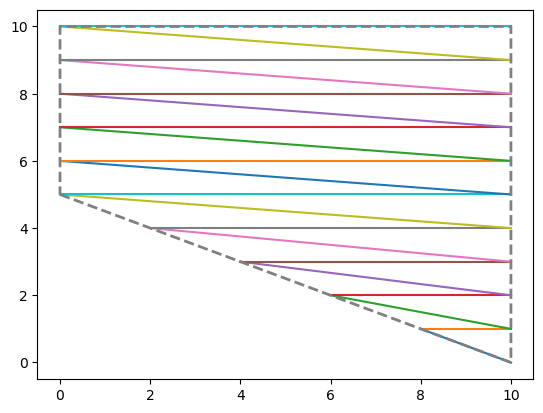

In [14]:
from shapely.geometry import Polygon, LineString, MultiLineString, box
from shapely.ops import unary_union
import matplotlib.pyplot as plt

# Supongamos que el polígono ya está definido
# polygon = Polygon([...])

# Definimos una función para generar las líneas paralelas de recorrido
def generate_lines(polygon, distance_between_lines, direction='horizontal'):
    bounds = polygon.bounds
    lines = []
    
    if direction == 'horizontal':
        y_start, y_end = bounds[1], bounds[3]
        x_start, x_end = bounds[0], bounds[2]
        
        # Generamos líneas horizontales desde el mínimo al máximo Y dentro del polígono
        y = y_start
        while y <= y_end:
            line = LineString([(x_start, y), (x_end, y)])
            y += distance_between_lines
            if line.intersects(polygon):
                # Solo añadimos la parte de la línea que está dentro del polígono
                lines.append(line.intersection(polygon))
                
    # La implementación para 'vertical' sería similar, cambiando x por y
    
    return lines

# Generamos las líneas de recorrido
def generate_drone_path(polygon, distance_between_lines):
    # Generamos las líneas paralelas
    parallel_lines = generate_lines(polygon, distance_between_lines)
    
    # Unimos el final de una línea con el inicio de la siguiente
    path_lines = []
    for i in range(len(parallel_lines) - 1):
        current_line = parallel_lines[i]
        next_line = parallel_lines[i+1]
        # Obtenemos el último punto de la línea actual y el primero de la siguiente
        current_end = Point(list(current_line.coords)[-1])
        next_start = Point(list(next_line.coords)[0])
        # Creamos una línea entre esos dos puntos
        connecting_line = LineString([current_end, next_start])
        
        # Agregamos la línea actual y la línea de conexión al recorrido
        path_lines.append(current_line)
        path_lines.append(connecting_line)
    
    # Agregamos la última línea al recorrido
    path_lines.append(parallel_lines[-1])
    
    # Unimos todas las líneas para crear un solo camino
    drone_path = unary_union(path_lines)
    return drone_path

# Definimos el polígono del lote y la distancia entre las líneas de recorrido
polygon = Polygon([(0, 5), (10, 0), (10, 10), (0, 10)])  # Un cuadrado como ejemplo
distance_between_lines = 1  # Cambiar a la distancia deseada

# Generamos el camino del dron
drone_path = generate_drone_path(polygon, distance_between_lines)

# Dibujamos el camino del dron y el polígono
fig, ax = plt.subplots()
for geom in drone_path.geoms:
    if isinstance(geom, LineString):
        x, y = geom.xy
        ax.plot(x, y)
    elif isinstance(geom, MultiLineString):
        for line in geom:
            x, y = line.xy
            ax.plot(x, y)

x, y = polygon.exterior.xy
ax.plot(x, y, color='grey', linewidth=2, linestyle='--')  # Dibujar el polígono

plt.show()


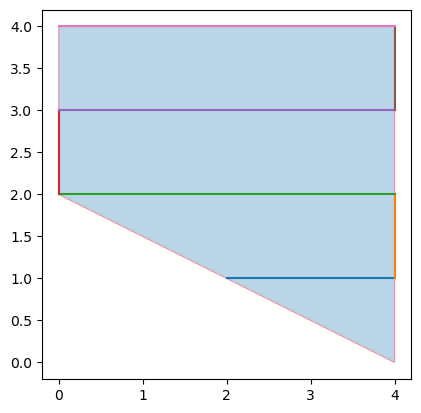

In [17]:
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.ops import unary_union
import matplotlib.pyplot as plt

def create_zigzag_path(polygon, distance_between_paths):
    bounds = polygon.bounds
    minx, miny, maxx, maxy = bounds
    lines = []
    
    # Generar líneas horizontales desde el mínimo al máximo y dentro del polígono
    y = miny
    while y <= maxy:
        line = LineString([(minx, y), (maxx, y)])
        if line.intersects(polygon):
            # Obtener la intersección de la línea con el polígono, asegurando que está dentro de los límites
            intersection_line = line.intersection(polygon)
            if isinstance(intersection_line, LineString):
                lines.append(intersection_line)
            elif isinstance(intersection_line, MultiLineString):
                for segment in intersection_line:
                    lines.append(segment)
        y += distance_between_paths

    # Conectar las líneas en un patrón de zigzag
    zigzag_path = []
    for i in range(len(lines)):
        if i % 2 == 1:
            # Invertir la línea para que el dron regrese en la dirección opuesta
            lines[i] = LineString(list(lines[i].coords)[::-1])

        if i > 0:
            # Conectar el final de la línea anterior con el inicio de la línea actual
            connector = LineString([lines[i-1].coords[-1], lines[i].coords[0]])
            zigzag_path.append(connector)

        zigzag_path.append(lines[i])

    # Unir todo en un MultiLineString
    return MultiLineString(zigzag_path)

# Ejemplo de uso
polygon_coords = [(0, 2), (4, 0), (4, 4), (0, 4)]  # Un cuadrado simple
polygon = Polygon(polygon_coords)
distance_between_paths = 1

# Generar el camino
drone_path = create_zigzag_path(polygon, distance_between_paths)

# Visualización
fig, ax = plt.subplots()
for geom in drone_path.geoms:
    x, y = geom.xy
    ax.plot(x, y)

ax.fill(*polygon.exterior.xy, alpha=0.3, edgecolor='r')
ax.set_aspect('equal')
plt.show()


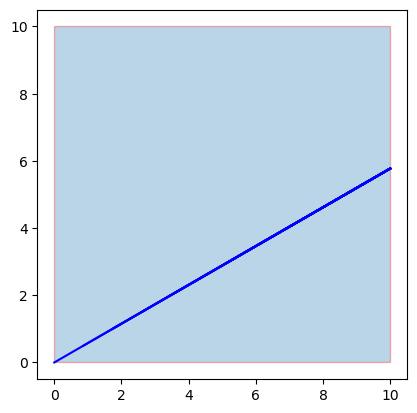

In [18]:
from shapely.geometry import Polygon, LineString, MultiLineString, Point
from shapely.affinity import rotate, translate
from math import radians, cos, sin
import matplotlib.pyplot as plt

def create_inclined_lines(polygon, angle, distance_between_paths):
    # Calcular la dirección del desplazamiento basado en el ángulo
    angle_rad = radians(angle)
    dx = distance_between_paths * cos(angle_rad)
    dy = distance_between_paths * sin(angle_rad)

    # Encontrar el punto más bajo a la izquierda para empezar las líneas
    minx, miny, maxx, maxy = polygon.bounds
    startx, starty = minx, miny
    endx, endy = maxx, maxy

    # Crear la línea base en el ángulo deseado y rotarla alrededor del punto más bajo a la izquierda
    line = LineString([(startx, starty), (endx, starty)])
    rotated_line = rotate(line, angle, origin=(startx, starty), use_radians=False)

    # Intersección de la línea con el polígono
    if not rotated_line.intersects(polygon):
        rotated_line = translate(rotated_line, xoff=-dx, yoff=-dy)

    # Generar líneas hasta que ya no intersecten el polígono
    lines = []
    while rotated_line.intersects(polygon):
        intersection_line = rotated_line.intersection(polygon)
        if not intersection_line.is_empty:
            if isinstance(intersection_line, LineString):
                lines.append(intersection_line)
            elif isinstance(intersection_line, MultiLineString):
                lines.extend([line for line in intersection_line])
        # Desplazar la línea en la dirección perpendicular
        rotated_line = translate(rotated_line, xoff=dx, yoff=dy)

    return lines

def connect_lines(lines):
    path = [lines[0]]
    for i in range(1, len(lines)):
        # Conectar el final de la línea actual con el inicio o final de la siguiente, según la paridad
        if i % 2 == 0:
            connector = LineString([lines[i-1].coords[-1], lines[i].coords[0]])
        else:
            connector = LineString([lines[i-1].coords[-1], lines[i].coords[-1]])
        path.append(connector)
        path.append(lines[i])
    return MultiLineString(path)

# Ejemplo de uso
polygon_coords = [(0, 0), (10, 0), (10, 10), (0, 10)]  # Un cuadrado simple
polygon = Polygon(polygon_coords)
angle = 30  # Ángulo de inclinación
distance_between_paths = 1  # Distancia entre las líneas

# Generar las líneas inclinadas
inclined_lines = create_inclined_lines(polygon, angle, distance_between_paths)

# Conectar las líneas en un patrón de zigzag
drone_path = connect_lines(inclined_lines)

# Visualizar el polígono y las líneas del recorrido
fig, ax = plt.subplots()
for geom in drone_path.geoms:
    x, y = geom.xy
    ax.plot(x, y, 'b')

ax.fill(*polygon.exterior.xy, alpha=0.3, edgecolor='r')
ax.set_aspect('equal')
plt.show()


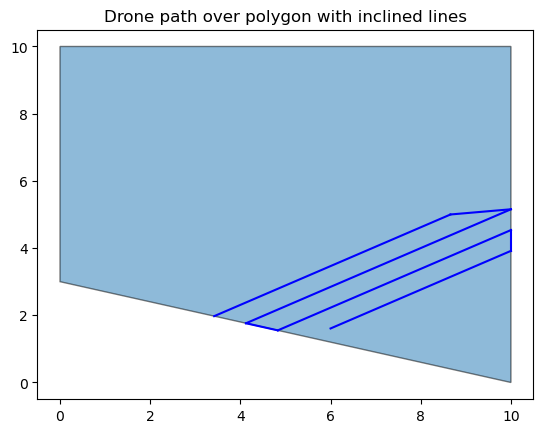

In [20]:
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.affinity import rotate, translate
from math import sqrt, tan, radians
import matplotlib.pyplot as plt

def generate_inclined_lines_within_polygon(polygon, angle_degrees, distance_between_lines):
    angle_radians = radians(angle_degrees)
    minx, miny, maxx, maxy = polygon.bounds
    diagonal_length = sqrt((maxx - minx)**2 + (maxy - miny)**2)
    step_size = distance_between_lines / sin(angle_radians)  # Adjust based on angle to ensure coverage
    
    lines = []
    for step in range(int(diagonal_length // step_size) + 1):
        # Create a horizontal line at the bottom, then rotate and translate it into position
        base_line = LineString([(minx, miny - step_size * step), (maxx, miny - step_size * step)])
        rotated_line = rotate(base_line, angle_degrees, origin=(minx, miny), use_radians=False)
        translated_line = translate(rotated_line, yoff=step * step_size)

        # If the line intersects the polygon, add its intersection
        if translated_line.intersects(polygon):
            intersection_line = translated_line.intersection(polygon)
            lines.append(intersection_line)
    
    return lines

def create_zigzag_path_from_lines(lines):
    zigzag_path = []
    for i, line in enumerate(lines):
        # Reverse every other line to create the zigzag effect
        if i % 2 != 0:
            line = LineString(list(line.coords)[::-1])
        if i > 0:
            # Connect the end of the previous line to the start of the current line
            prev_line_end = Point(zigzag_path[-1].coords[-1])
            current_line_start = Point(line.coords[0])
            connector = LineString([prev_line_end, current_line_start])
            zigzag_path.append(connector)
        zigzag_path.append(line)
    
    return MultiLineString(zigzag_path)

# Define the polygon and parameters for the lines
polygon = Polygon([(0, 3), (10, 0), (10, 10), (0, 10)])  # Example square polygon
angle_degrees = 30
distance_between_lines = 2

# Generate inclined lines and create the zigzag path
inclined_lines = generate_inclined_lines_within_polygon(polygon, angle_degrees, distance_between_lines)
drone_path = create_zigzag_path_from_lines(inclined_lines)

# Plotting
fig, ax = plt.subplots()
for geom in drone_path.geoms:
    xs, ys = geom.xy
    ax.plot(xs, ys, 'b')

x, y = polygon.exterior.xy
ax.fill(x, y, alpha=0.5, ec='black')
ax.set_title('Drone path over polygon with inclined lines')
plt.show()


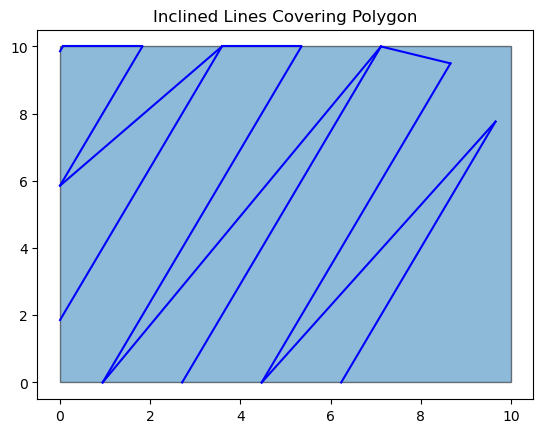

In [21]:
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.affinity import rotate, translate
from math import radians, cos, sin, tan, ceil
import matplotlib.pyplot as plt

def generate_inclined_lines(polygon, angle_deg, distance_between_lines):
    bounds = polygon.bounds
    angle_rad = radians(angle_deg)
    
    # Determinar la longitud necesaria para la línea base
    diagonal_length = ((bounds[2] - bounds[0])**2 + (bounds[3] - bounds[1])**2)**0.5
    line_length = diagonal_length * cos(angle_rad) + diagonal_length * sin(angle_rad)
    
    # Número de líneas basado en la distancia entre ellas y la diagonal del polígono
    num_lines = ceil(diagonal_length / distance_between_lines)

    # Generar las líneas
    lines = []
    for i in range(num_lines):
        offset_x = distance_between_lines * sin(angle_rad) * i
        offset_y = distance_between_lines * cos(angle_rad) * i
        
        # Punto de inicio y final de la línea antes de la rotación
        start_point = (bounds[0] - offset_x, bounds[1] - diagonal_length + offset_y)
        end_point = (bounds[0] + line_length - offset_x, bounds[1] + offset_y)
        
        line = LineString([start_point, end_point])
        
        # Rotar y trasladar la línea
        rotated_line = rotate(line, angle_deg, origin=start_point, use_radians=False)
        
        # Añadir la línea si intersecta el polígono
        if rotated_line.intersects(polygon):
            intersection = rotated_line.intersection(polygon)
            if not intersection.is_empty:
                lines.append(intersection)
                
    return lines

def connect_lines_in_zigzag(lines):
    # Asumiendo que las líneas ya están ordenadas y orientadas correctamente
    connected_lines = []
    for i, line in enumerate(lines[:-1]):
        next_line = lines[i + 1]
        if i % 2 == 0:
            # Conectar fin de la línea actual con el inicio de la siguiente
            connector = LineString([line.coords[-1], next_line.coords[0]])
        else:
            # Conectar fin de la línea actual con el fin de la siguiente (inverso)
            connector = LineString([line.coords[-1], next_line.coords[-1]])
        connected_lines.extend([line, connector])
    # Añadir la última línea
    connected_lines.append(lines[-1])
    return MultiLineString(connected_lines)

polygon = Polygon([(0, 0), (10, 0), (10, 10), (0, 10)])
angle_deg = 30
distance_between_lines = 2

# Generar líneas inclinadas y conectarlas
inclined_lines = generate_inclined_lines(polygon, angle_deg, distance_between_lines)
zigzag_path = connect_lines_in_zigzag(inclined_lines)

# Visualización
fig, ax = plt.subplots()
for geom in zigzag_path.geoms:
    xs, ys = geom.xy
    ax.plot(xs, ys, 'b')

x, y = polygon.exterior.xy
ax.fill(x, y, alpha=0.5, ec='black')
ax.set_title('Inclined Lines Covering Polygon')
plt.show()


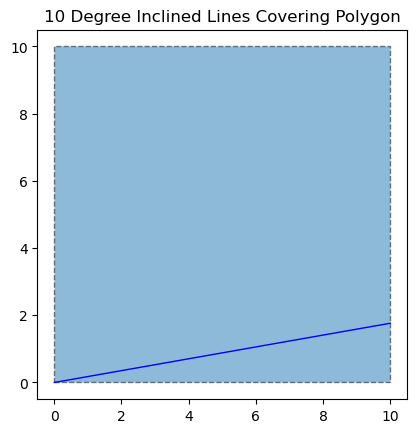

In [22]:
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.affinity import rotate, translate
from math import radians, cos, sin, tan, ceil
import matplotlib.pyplot as plt

def generate_inclined_lines(polygon, angle_deg, distance_between_lines):
    bounds = polygon.bounds
    angle_rad = radians(angle_deg)
    
    # Calcular la longitud y la dirección de las líneas
    diagonal_length = ((bounds[2] - bounds[0])**2 + (bounds[3] - bounds[1])**2)**0.5
    line_length = diagonal_length * (cos(angle_rad) + sin(angle_rad))
    
    num_lines = ceil(diagonal_length / distance_between_lines)
    lines = []

    for i in range(num_lines + 1):  # +1 para asegurar cobertura completa
        offset = distance_between_lines * i
        offset_x = offset * sin(angle_rad)
        offset_y = offset * cos(angle_rad)

        start_point = (bounds[0] - offset_x, bounds[1] - offset_y)
        end_point = (start_point[0] + line_length, start_point[1])

        line = LineString([start_point, end_point])
        rotated_line = rotate(line, angle_deg, origin=(bounds[0], bounds[1]), use_radians=False)
        
        if rotated_line.intersects(polygon):
            intersection = rotated_line.intersection(polygon)
            if not intersection.is_empty:
                lines.append(intersection)

    return lines

def connect_lines_in_zigzag(lines):
    connected_lines = []
    for i, line in enumerate(lines[:-1]):
        next_line_start = lines[i + 1].coords[0] if i % 2 == 0 else lines[i + 1].coords[-1]
        connector = LineString([line.coords[-1], next_line_start])
        connected_lines.extend([line, connector])
    connected_lines.append(lines[-1])
    return MultiLineString(connected_lines)

# Definición del polígono y parámetros
polygon = Polygon([(0, 0), (10, 0), (10, 10), (0, 10)])
angle_deg = 10  # Cambio a 10 grados de inclinación
distance_between_lines = 2

# Generación de líneas inclinadas
inclined_lines = generate_inclined_lines(polygon, angle_deg, distance_between_lines)
zigzag_path = connect_lines_in_zigzag(inclined_lines)

# Visualización
fig, ax = plt.subplots()
for geom in zigzag_path.geoms:
    xs, ys = geom.xy
    ax.plot(xs, ys, 'b', linewidth=1)

x, y = polygon.exterior.xy
ax.fill(x, y, alpha=0.5, ec='black', linestyle='--')
ax.set_title('10 Degree Inclined Lines Covering Polygon')
ax.set_aspect('equal')
plt.show()


In [23]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from shapely.affinity import rotate, translate
from math import radians, cos, sin

def create_inclined_coverage(polygon, angle, distance):
    bounds = polygon.bounds
    width = max(bounds[2] - bounds[0], bounds[3] - bounds[1]) * 2
    angle_rad = radians(angle)

    start_x = bounds[0] - width
    start_y = bounds[1] - width
    end_x = start_x + width * 2
    line = LineString([(start_x, start_y), (end_x, start_y)])

    rotated_line = rotate(line, angle, origin=(start_x, start_y), use_radians=False)

    lines = []
    displacement = 0
    while True:
        displaced_line = translate(rotated_line, yoff=displacement)
        if not displaced_line.intersects(polygon):
            break
        if polygon.intersects(displaced_line):
            lines.append(polygon.intersection(displaced_line))
        displacement += distance / cos(angle_rad)

    # Alternating direction for zigzag pattern
    for i in range(len(lines)):
        if i % 2 == 1:
            lines[i] = LineString(list(lines[i].coords)[::-1])

    # Connect lines
    connected_lines = [lines[0]]
    for i in range(1, len(lines)):
        connector = LineString([connected_lines[-1].coords[-1], lines[i].coords[0]])
        connected_lines.append(connector)
        connected_lines.append(lines[i])

    return connected_lines

# Define polygon and parameters
polygon = Polygon([(0, 0), (10, 0), (10, 10), (0, 10)])
angle = 10  # Degrees
distance_between_lines = 2  # Distance between paths

# Generate lines and plot
lines = create_inclined_coverage(polygon, angle, distance_between_lines)
fig, ax = plt.subplots()
polygon_patch = plt.Polygon(polygon.exterior.coords, alpha=0.5, edgecolor='black', linestyle='--')
ax.add_patch(polygon_patch)
for line in lines:
    x, y = line.xy
    ax.plot(x, y, 'b')
ax.set_xlim([min(x) - 1, max(x) + 1])
ax.set_ylim([min(y) - 1, max(y) + 1])
ax.set_aspect('equal')
plt.show()


IndexError: list index out of range

ValueError: min() arg is an empty sequence

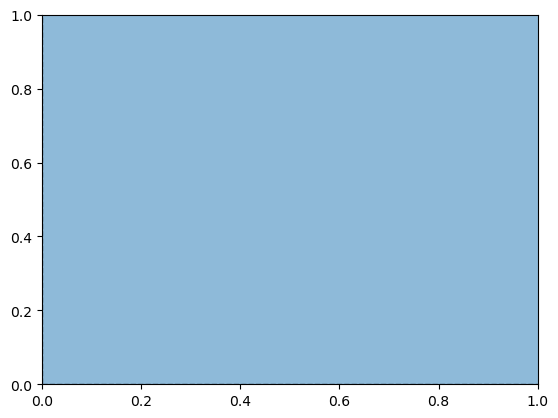

In [24]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from shapely.affinity import rotate, translate
from math import radians, cos, sin

def create_inclined_coverage(polygon, angle, distance):
    bounds = polygon.bounds
    diagonal_length = max(bounds[2] - bounds[0], bounds[3] - bounds[1]) * 3
    angle_rad = radians(angle)

    # Asegurar que las líneas iniciales cubran completamente el polígono
    start_point = (bounds[0] - diagonal_length, bounds[1] - diagonal_length)
    end_point = (start_point[0] + diagonal_length * 2, start_point[1])
    line = LineString([start_point, end_point])

    rotated_line = rotate(line, angle, origin=start_point, use_radians=False)
    
    lines = []
    displacement = 0
    # Incrementar el desplazamiento para cubrir el área del polígono
    while True:
        displaced_line = translate(rotated_line, yoff=displacement * sin(angle_rad))
        if displaced_line.disjoint(polygon):
            break
        intersection = polygon.intersection(displaced_line)
        if not intersection.is_empty:
            lines.append(intersection)
        displacement += distance / cos(angle_rad)

    # Conectar las líneas en un patrón zigzag, verificando la longitud de la lista
    connected_lines = []
    if lines:
        connected_lines.append(lines[0])
        for i in range(1, len(lines)):
            end_coords = connected_lines[-1].coords[-1] if i % 2 == 1 else connected_lines[-1].coords[0]
            start_coords = lines[i].coords[0] if i % 2 == 1 else lines[i].coords[-1]
            connector = LineString([end_coords, start_coords])
            connected_lines.append(connector)
            connected_lines.append(lines[i])

    return connected_lines

# Define polygon and parameters
polygon = Polygon([(0, 0), (10, 0), (10, 10), (0, 10)])
angle = 10  # Degrees
distance_between_lines = 2  # Distance between paths

# Generate lines and plot
lines = create_inclined_coverage(polygon, angle, distance_between_lines)
fig, ax = plt.subplots()
polygon_patch = plt.Polygon(polygon.exterior.coords, alpha=0.5, edgecolor='black', linestyle='--')
ax.add_patch(polygon_patch)
for line in lines:
    if isinstance(line, LineString):
        x, y = line.xy
        ax.plot(x, y, 'b')
    elif isinstance(line, Polygon):  # In case intersection results in a Polygon
        x, y = line.exterior.xy
        ax.plot(x, y, 'b')
ax.set_xlim([min([pt[0] for line in lines for pt in line.coords]) - 1, 
             max([pt[0] for line in lines for pt in line.coords]) + 1])
ax.set_ylim([min([pt[1] for line in lines for pt in line.coords]) - 1, 
             max([pt[1] for line in lines for pt in line.coords]) + 1])
ax.set_aspect('equal')
plt.show()


NameError: name 'first_line_start_point' is not defined

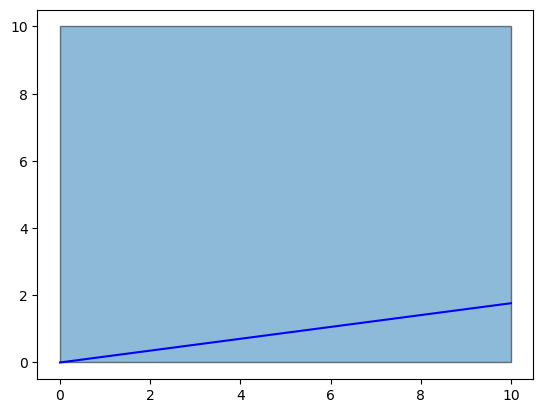

In [25]:
def connect_lines_in_zigzag_alternate(lines):
    # Asumiendo que las líneas ya están ordenadas y orientadas correctamente
    connected_lines = []
    for i, line in enumerate(lines[:-1]):
        next_line = lines[i + 1]
        if i % 2 == 0:
            # Conectar fin de la línea actual con el fin de la siguiente
            connector = LineString([line.coords[-1], next_line.coords[-1]])
        else:
            # Conectar inicio de la línea actual con el inicio de la siguiente
            connector = LineString([line.coords[0], next_line.coords[0]])
        connected_lines.extend([line, connector])
    # Añadir la última línea
    connected_lines.append(lines[-1])
    return MultiLineString(connected_lines)

# Utilizar la regla alternativa para conectar las líneas
zigzag_path_alternate = connect_lines_in_zigzag_alternate(inclined_lines)

# Visualización con la regla alternativa
fig, ax = plt.subplots()
for geom in zigzag_path_alternate.geoms:
    xs, ys = geom.xy
    ax.plot(xs, ys, 'b')

x, y = polygon.exterior.xy
ax.fill(x, y, alpha=0.5, ec='black')

# Marcar el inicio de la primera línea dibujada
ax.plot(*first_line_start_point, 'ro') # punto rojo

ax.set_title('Inclined Lines with Alternate Zigzag Connection')
plt.show()


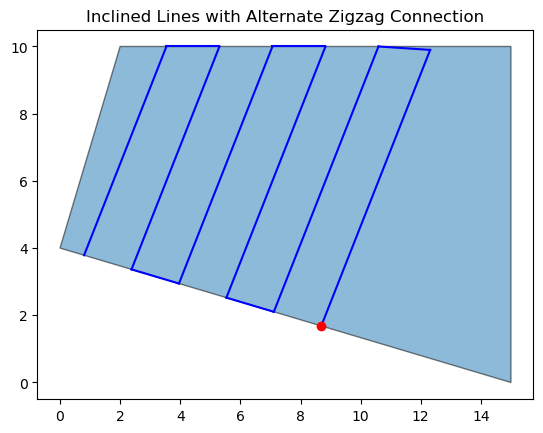

In [3]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.affinity import rotate
from math import radians, cos, sin, ceil

def generate_inclined_lines(polygon, angle_deg, distance_between_lines):
    bounds = polygon.bounds
    angle_rad = radians(angle_deg)
    
    # Determinar la longitud necesaria para la línea base
    diagonal_length = ((bounds[2] - bounds[0])**2 + (bounds[3] - bounds[1])**2)**0.5
    line_length = diagonal_length * cos(angle_rad) + diagonal_length * sin(angle_rad)
    
    # Número de líneas basado en la distancia entre ellas y la diagonal del polígono
    num_lines = ceil(diagonal_length / distance_between_lines)

    # Generar las líneas
    lines = []
    first_line_start_point = None  # Inicializar aquí
    for i in range(num_lines):
        offset_x = distance_between_lines * sin(angle_rad) * i
        offset_y = distance_between_lines * cos(angle_rad) * i
        
        # Punto de inicio y final de la línea antes de la rotación
        start_point = (bounds[0] - offset_x, bounds[1] - diagonal_length + offset_y)
        end_point = (bounds[0] + line_length - offset_x, bounds[1] + offset_y)
        
        line = LineString([start_point, end_point])
        
        # Rotar y trasladar la línea
        rotated_line = rotate(line, angle_deg, origin=start_point, use_radians=False)
        
        # Añadir la línea si intersecta el polígono
        if rotated_line.intersects(polygon):
            intersection = rotated_line.intersection(polygon)
            if not intersection.is_empty:
                lines.append(intersection)
                if first_line_start_point is None:
                    first_line_start_point = intersection.coords[0]  # Asignar valor
                
    return lines, first_line_start_point

def connect_lines_in_zigzag_alternate(lines):
    # Asumiendo que las líneas ya están ordenadas y orientadas correctamente
    connected_lines = []
    for i, line in enumerate(lines[:-1]):
        next_line = lines[i + 1]
        if i % 2 == 0:
            # Conectar fin de la línea actual con el fin de la siguiente
            connector = LineString([line.coords[-1], next_line.coords[-1]])
        else:
            # Conectar inicio de la línea actual con el inicio de la siguiente
            connector = LineString([line.coords[0], next_line.coords[0]])
        connected_lines.extend([line, connector])
    # Añadir la última línea
    connected_lines.append(lines[-1])
    return MultiLineString(connected_lines)

polygon = Polygon([(0, 4), (15, 0), (15, 10), (2, 10)])
angle_deg = 30
distance_between_lines = 2

# Generar líneas inclinadas y capturar el punto de inicio de la primera línea
inclined_lines, first_line_start_point = generate_inclined_lines(polygon, angle_deg, distance_between_lines)

# Conectar las líneas siguiendo la nueva regla
zigzag_path_alternate = connect_lines_in_zigzag_alternate(inclined_lines)

# Visualización
fig, ax = plt.subplots()
for geom in zigzag_path_alternate.geoms:
    xs, ys = geom.xy
    ax.plot(xs, ys, 'b')

x, y = polygon.exterior.xy
ax.fill(x, y, alpha=0.5, ec='black')

# Marcar el inicio de la primera línea dibujada
ax.plot(*first_line_start_point, 'ro')  # Punto rojo

ax.set_title('Inclined Lines with Alternate Zigzag Connection')
plt.show()


In [ ]:
exportar el 

In [42]:
from shapely.geometry import Polygon, LineString, MultiLineString
from shapely.affinity import rotate
from math import radians, cos, sin, ceil
import geopandas as gpd

def generate_inclined_lines(polygon, angle_deg, distance_between_lines):
    bounds = polygon.bounds
    angle_rad = radians(angle_deg)
    
    # Calcular la longitud necesaria para la línea base
    diagonal_length = ((bounds[2] - bounds[0])**2 + (bounds[3] - bounds[1])**2)**0.5
    line_length = diagonal_length * cos(angle_rad) + diagonal_length * sin(angle_rad)
    
    # Número de líneas basado en la distancia entre ellas
    num_lines = ceil(diagonal_length / distance_between_lines)

    lines = []
    for i in range(num_lines):
        offset_x = distance_between_lines * sin(angle_rad) * i
        offset_y = distance_between_lines * cos(angle_rad) * i
        
        # Punto de inicio y final de la línea antes de la rotación
        start_point = (bounds[0] - offset_x, bounds[1] - diagonal_length + offset_y)
        end_point = (bounds[0] + line_length - offset_x, bounds[1] + offset_y)
        
        line = LineString([start_point, end_point])
        rotated_line = rotate(line, angle_deg, origin=start_point, use_radians=False)
        
        if rotated_line.intersects(polygon):
            intersection = rotated_line.intersection(polygon)
            if not intersection.is_empty:
                lines.append(intersection)
                
    return lines

def connect_lines_in_zigzag(lines):
    connected_lines = []
    for i, line in enumerate(lines[:-1]):
        next_line = lines[i + 1]
        if i % 2 == 0:
            connector = LineString([line.coords[-1], next_line.coords[-1]])
        else:
            connector = LineString([line.coords[0], next_line.coords[0]])
        connected_lines.extend([line, connector])
    connected_lines.append(lines[-1])
    return MultiLineString(connected_lines)

# Definición del polígono y parámetros
polygon = Polygon([(0, 400), (1000, 0), (1000, 10), (0, 1000)])
angle_deg = 0
distance_between_lines = 30

# Generar y conectar líneas
inclined_lines = generate_inclined_lines(polygon, angle_deg, distance_between_lines)
zigzag_path = connect_lines_in_zigzag(inclined_lines)

# Convertir a GeoDataFrame para exportar
gdf = gpd.GeoDataFrame(geometry=[zigzag_path])

# Exportar a Shapefile
output_filename = "zigzag_path.shp"
gdf.to_file(output_filename)

output_filename


'zigzag_path.shp'